In [143]:
import csv
import pandas as pd
import numpy as np
import sympy as sp
import re
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
pd.set_option('display.max_rows',None) #row들을 전부 표시한다.
pd.set_option('display.max_columns',None) #column들을 전부 표시한다.

In [199]:
#csv 파일을 불러온다.
df = pd.read_csv("./6th_data/Regular_Season_Batter.csv")

def get_sorted_df(df):
    #필요한 columns만 dataframe으로 설정한다.
    requiredColumns = ['batter_id','batter_name','G','SB','CS','BB','height/weight','SLG']
    df = df[requiredColumns]

    #같은 선수들의 row를 합쳐주는데, str type의 경우는 첫째 value로 설정.
    remained = lambda x: x[0:1]
    df = df.groupby('batter_id').agg({'batter_name':remained,'G':np.sum,'SB':np.sum,\
                                          'CS':np.sum,'BB':np.sum,'height/weight':remained,'SLG':np.average})

    #NaN value가 있는 row를 제거한다.
    df = df.dropna()
    #참가한 게임 수가 최소치 이상인 데이터만 사용한다.
    df = df.loc[(df['G'] >= 50) & (df['SB']+df['CS'] >10),:]

    # 도루 성공률을 위한 series들을 추가 및 반올림을 해준다.
    df['SB+CS'] = df.SB + df.CS
    df['SB%'] = (df['SB']/df['SB+CS']).round(4)
    df['(SB+CS)/G'] = (df['SB+CS']/df['G']).round(4)
    df['BB/G'] = (df['BB']/df['G']).round(4)
    df['SLG'] = df['SLG'].round(4)
    
    #키와 체중 데이터를 regex로 각 리스트를 구한다.
    p = re.compile(r'\A(\d+)cm/(\d+)kg\Z')
    height, weight = [], []
    for e in df['height/weight']:
        matched = p.search(e).groups()
        height.append(int(matched[0]))
        weight.append(int(matched[1]))

    #구한 키와 체중 데이터를 dataframe에 칼럼으로 삽입하고, 기존의 키/체중 칼럼은 삭제한다.
    df['height'] = height
    df['weight'] = weight
    df['height/weight'] = (df['height']/df['weight']).round(4)
    df['weight/height'] = (df['weight']/df['height']).round(4)

    #series 순서(컬럼 순서)를 정한다.
    df = df[['batter_name','G','height','weight','height/weight','weight/height','SB','CS',\
             'SB+CS','SB%','(SB+CS)/G','BB','BB/G','SLG']]
    return df

df = get_sorted_df(df)
df


,batter_name,G,height,weight,height/weight,weight/height,SB,CS,SB+CS,SB%,(SB+CS)/G,BB,BB/G,SLG
batter_id,,,,,,,,,,,,,,
1,강경학,345,180,72,2.5000,0.4000,11,7,18,0.6111,0.0522,107,0.3101,0.2642
4,강민호,1624,185,100,1.8500,0.5405,23,32,55,0.4182,0.0339,569,0.3504,0.4295
12,강한울,505,181,66,2.7424,0.3646,35,20,55,0.6364,0.1089,74,0.1465,0.3134
18,고종욱,539,184,83,2.2169,0.4511,91,42,133,0.6842,0.2468,97,0.1800,0.3635
19,구자욱,484,189,75,2.5200,0.3968,47,16,63,0.7460,0.1302,206,0.4256,0.5352
23,권희동,481,177,85,2.0824,0.4802,14,9,23,0.6087,0.0478,152,0.3160,0.4098
28,김규민,118,188,85,2.2118,0.4521,8,4,12,0.6667,0.1017,28,0.2373,0.3510
30,김동엽,306,186,101,1.8416,0.5430,15,7,22,0.6818,0.0719,45,0.1471,0.4977
33,김동한,250,174,74,2.3514,0.4253,19,5,24,0.7917,0.0960,31,0.1240,0.4106


In [200]:
df2 = pd.read_csv(r'.\note2.csv')
df2 = get_sorted_df(df2)
df2

,batter_name,G,height,weight,height/weight,weight/height,SB,CS,SB+CS,SB%,(SB+CS)/G,BB,BB/G,SLG
batter_id,,,,,,,,,,,,,,
0,이종범,1706,178,73,2.4384,0.4101,510,113,623,0.8186,0.3652,634,0.3716,0.458


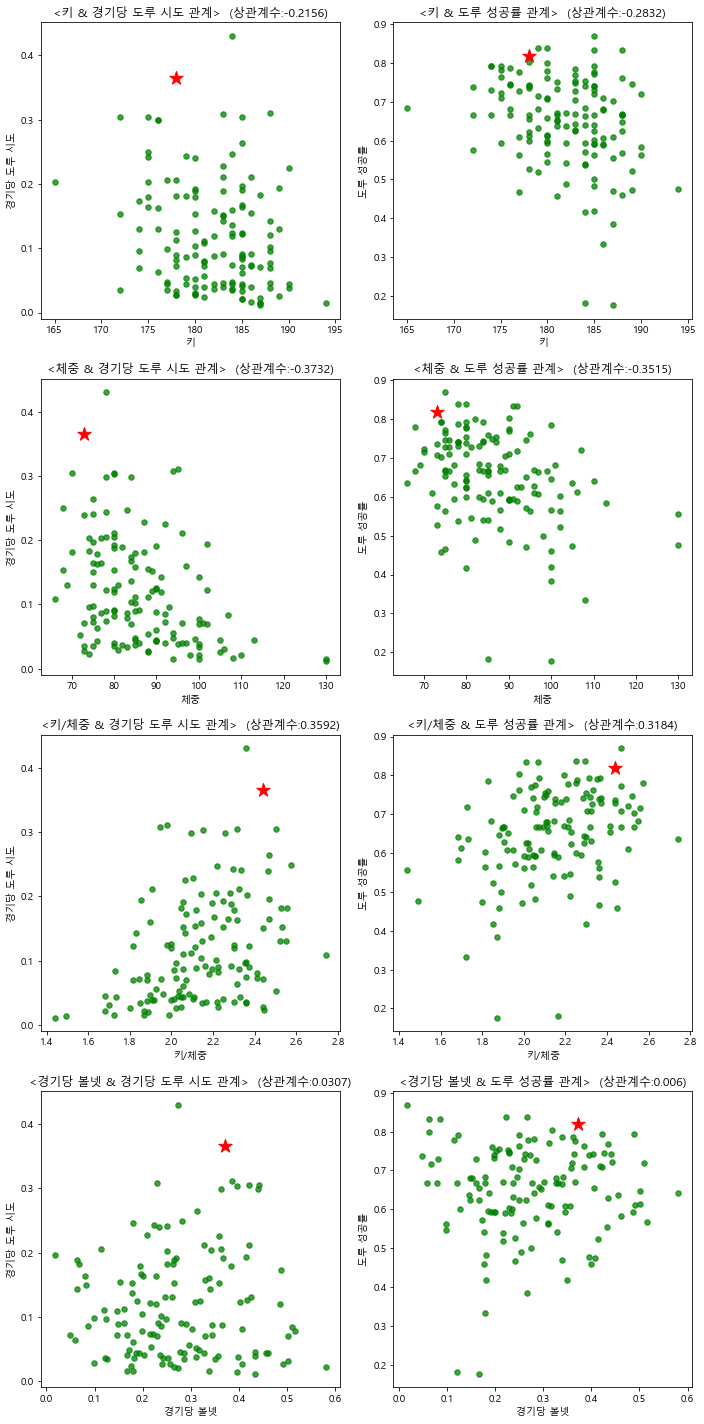

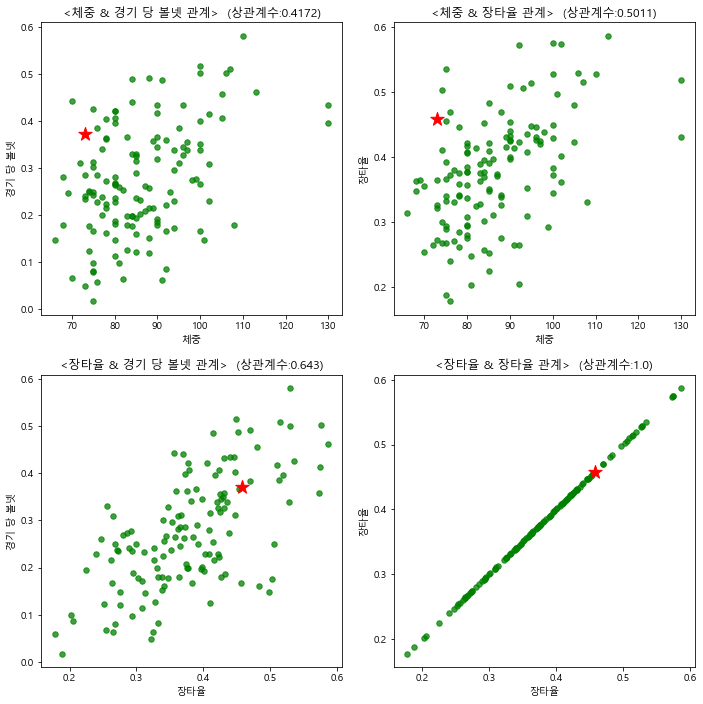

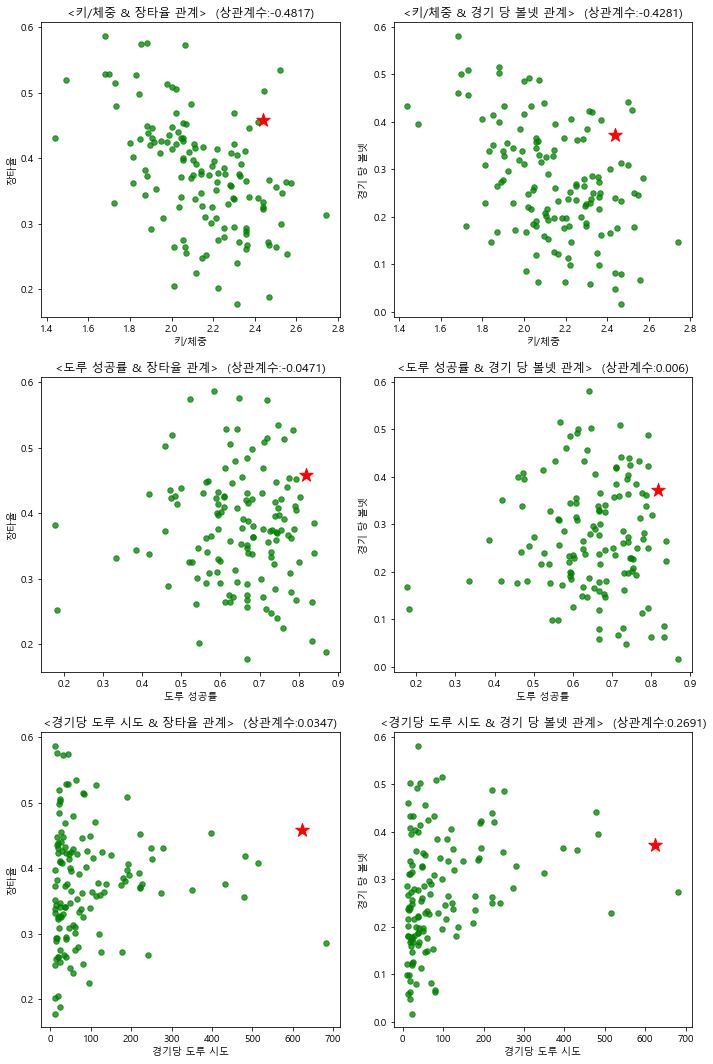

In [204]:
"""각 축에 원하는 Series들을 dictionary 형태({series_column명:그래프에 표시될 문구})로
input하면 plt.subplots로 scatter 해주는 함수.
"""
def scatters(df, x_axes, y_axes, special_df=None, figsize = None, **opt):
    #figsize가 입력되지 않았다면, 차원 수에 맞춰서 figsize를 지정해준다.
    if figsize == None:
        figsize = (len(y_axes)*5, len(x_axes)*5)
    
    fig, ax = plt.subplots(nrows=len(x_axes),ncols=len(y_axes),sharey=False,figsize=figsize)

    for x_idx, x_ax in enumerate(x_axes):
        for y_idx, y_ax in enumerate(y_axes):
            if len(x_axes) * len(y_axes) == 1:
                ax_temp = ax
            elif len(x_axes) == 1:
                ax_temp = ax[y_idx]
            elif len(y_axes) == 1:
                ax_temp = ax[x_idx]
            else: ax_temp = ax[x_idx, y_idx]    

            ax_temp.scatter(df[x_ax], df[y_ax], **opt)
            
            if special_df is not None:
                ax_temp.scatter(special_df[x_ax], special_df[y_ax], s=200, c='r', marker='*')
                    
            ax_temp.set_title(f'<{x_axes[x_ax]} & {y_axes[y_ax]} 관계>\
  (상관계수:{df[x_ax].corr(df[y_ax]).round(4)})')
        
            ax_temp.set_xlabel(f'{x_axes[x_ax]}')
            ax_temp.set_ylabel(f'{y_axes[y_ax]}')
            
    fig.tight_layout(pad=1.5)

x_axes = {'height':'키', 'weight':'체중', 'height/weight':'키/체중', 'BB/G':'경기당 볼넷'}
y_axes = {'(SB+CS)/G':'경기당 도루 시도','SB%':'도루 성공률'}
opt = dict(s=30, c='g', marker='o', alpha=0.75)
scatters(df, x_axes, y_axes, special_df=df2, **opt)
plt.savefig(r'myFig1.jpg')

x_axes = {'weight':'체중','SLG':'장타율'}
y_axes = {'BB/G':'경기 당 볼넷','SLG':'장타율'}
scatters(df, x_axes, y_axes, special_df=df2, **opt)
plt.savefig(r'myFig2.jpg')

x_axes = {'height/weight':'키/체중','SB%':'도루 성공률','SB+CS':'경기당 도루 시도'}
y_axes = {'SLG':'장타율','BB/G':'경기 당 볼넷'}
scatters(df, x_axes, y_axes, special_df=df2, **opt)
plt.savefig(r'myFig3.jpg')
